<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [4]:
    import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read thru the documentation to accomplish this task. 

`Tip:` You will need to install the `bs4` library inside your conda environment. 

In [75]:
from bs4 import BeautifulSoup
import requests

jobs = pd.read_csv(r'C:\Users\Emma\Desktop\DS-Unit-4-Sprint-1-NLP-master\DS-Unit-4-Sprint-1-NLP-master\module2-vector-representations\data\job_listings.csv')

In [12]:
jobs.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [37]:
jobs.shape

(426, 3)

In [11]:
jobs['description'][0]

'b"<div><div>Job Requirements:</div><ul><li><p>\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\\n</li><li><p>Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><d

In [16]:
sample = BeautifulSoup(jobs['description'][0], 'html.parser')

In [17]:
sample.get_text()

'b"Job Requirements:\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\\nHands on experience in SQL/Hive or similar programming language\\nMust show past work via GitHub, Kaggle or any other published article\\nMaster\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.\\nApply Now"'

In [76]:
#turning each row into the beautifulsoup object
jobs['description'] = jobs['description'].apply(lambda x: BeautifulSoup(x, 'html.parser'))

In [77]:
#using the beautifulsoup function on each object to extract the text from html
jobs['description'] = jobs['description'].apply(lambda x: x.get_text())

In [87]:
jobs['description'][0]

'b"Job Requirements:\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\\nHands on experience in SQL/Hive or similar programming language\\nMust show past work via GitHub, Kaggle or any other published article\\nMaster\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.\\nApply Now"'

In [ ]:
#import codecs

#codecs.encode(jobs['description'][0], encoding='utf-8')

In [96]:
codecs.decode(jobs['description'][0], 'unicode_escape')

'b"Job Requirements:\nConceptual understanding in Machine Learning models like NaiÂ¨ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\nHands on experience in SQL/Hive or similar programming language\nMust show past work via GitHub, Kaggle or any other published article\nMaster\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.\nApply Now"'

In [109]:
jobs['description'] = jobs['description'].apply(lambda x: codecs.decode(x, 'unicode_escape'))

In [110]:
jobs.head()

,Unnamed: 0,description,title
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist
1,1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I
2,2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level
3,3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist
4,4,b'Location: USA â multiple locations\n2+ yea...,Data Scientist


In [ ]:
#sample = jobs['description'][0].encode(encoding='UTF-8',errors='strict')
#sample

In [ ]:
#aample2 = sample.decode(encoding='UTF-8',errors='strict')
#aample2

In [ ]:
#codecs.decode(aample2, 'unicode_escape')

In [ ]:
#aample2.decode(encoding='UTF-8',errors='strict')

In [ ]:
#import ftfy 

#ftfy.fix_text(jobs['description'][0])

In [70]:
jobs.head()

,Unnamed: 0,description,title
0,0,"b""Job Requirements:\nConceptual understanding ...",Data scientist
1,1,"b'Job Description\n\nAs a Data Scientist 1, yo...",Data Scientist I
2,2,b'As a Data Scientist you will be working on c...,Data Scientist - Entry Level
3,3,"b'$4,969 - $6,756 a monthContractUnder the gen...",Data Scientist
4,4,b'Location: USA \xe2\x80\x93 multiple location...,Data Scientist


## 2) Use Spacy to tokenize the listings 

In [111]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load('en_core_web_md')

#actual tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [175]:
STOP_WORDS = nlp.Defaults.stop_words.union(['\n', 'r', '\n\n', '1,', 'b"job', 'data','work','business','learning','machine','science','analytics',])

In [176]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(jobs['description'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS)&(token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

jobs['des_tokens'] = tokens

In [193]:
def tokenize(column):
    for doc in tokenizer.pipe(column, batch_size=500):
        doc_tokens = []
        
        for token in doc:
            if (token.text.lower() not in STOP_WORDS)&(token.is_stop == False) & (token.is_punct == False):
                doc_tokens.append(token.text.lower())
            
        tokens.append(doc_tokens)
    
return column = tokens

SyntaxError: invalid syntax (<ipython-input-193-71cacc598028>, line 11)

In [120]:
jobs['des_tokens'][0]

['requirements:',
 'conceptual',
 'understanding',
 'machine',
 'learning',
 'models',
 'like',
 'naiâ¨ve',
 'bayes,',
 'k-means,',
 'svm,',
 'apriori,',
 'linear/',
 'logistic',
 'regression,',
 'neural,',
 'random',
 'forests,',
 'decision',
 'trees,',
 'k-nn',
 'hands-on',
 'experience',
 '2',
 'intermediate',
 'expert',
 'level',
 'coding',
 'skills',
 'python/r.',
 '(ability',
 'write',
 'functions,',
 'clean',
 'efficient',
 'data',
 'manipulation',
 'mandatory',
 'role)',
 'exposure',
 'packages',
 'like',
 'numpy,',
 'scipy,',
 'pandas,',
 'matplotlib',
 'etc',
 'python',
 'ggplot2,',
 'dplyr,',
 'tidyr',
 'ability',
 'communicate',
 'model',
 'findings',
 'technical',
 'non-technical',
 'stake',
 'holders',
 'hands',
 'experience',
 'sql/hive',
 'similar',
 'programming',
 'language',
 'past',
 'work',
 'github,',
 'kaggle',
 'published',
 'article',
 "master's",
 'degree',
 'statistics/mathematics/computer',
 'science',
 'quant',
 'specific',
 'field.',
 'apply',
 'now"']

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [138]:
def count_vectorizer(column):
    for x in column:
        vect= CountVectorizer(stop_words='english', max_df=.05)
        vect.fit(x)
    dtm = vect.transform(jobs['des_tokens'])
    dtm = pd.DataFrame(dtm.todense(), columns= vect.get_feature_names)
    return dtm

In [ ]:
count_vectorizer(jobs['des_tokens'])

In [177]:
vect = CountVectorizer(stop_words='english', max_df=.95)

vect.fit(jobs['description'])

dtm = vect.transform(jobs['description'])

dtm = pd.DataFrame(dtm.todense(), columns= vect.get_feature_names())

In [178]:
dtm.head()

,00,000,02115,03,0305,0356,04,062,06366,08,...,zf,zfâ,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich,zurichâ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [179]:
from collections import Counter

word_counts = Counter()

jobs['des_tokens'].apply(lambda x: word_counts.update(x))

top_ten = word_counts.most_common(10)
    

In [180]:
top_ten

[('experience', 1667),
 ('team', 786),
 ('statistical', 542),
 ('new', 519),
 ('ability', 502),
 ('product', 479),
 ('skills', 453),
 ('help', 448),
 ('working', 441),
 ('models', 437)]

In [181]:
#have to seperate the tuples into x and y to plot

x = []
y = []

for z in top_ten:
    x.append(z[0])
    y.append(z[1])

In [ ]:
#I decided to add some of these words to the stop list cause they seemed kind of basic
#but the new top words are as well, so maybe I will come back to this and be more selective

['data',
 'experience',
 'work',
 'business',
 'team',
 'learning',
 'machine',
 'science',
 'analytics',
 'statistical']

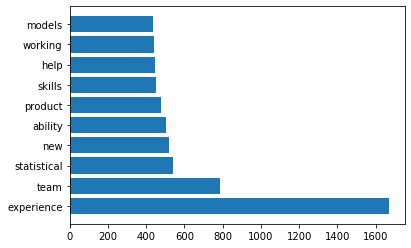

In [182]:
plt.barh(x, y)
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [194]:
def tokenize(document):
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [197]:
tfidf = TfidfVectorizer(stop_words = 'english',
                       ngram_range=(1,2),
                       max_df=.5,
                       min_df=3,
                       tokenizer= tokenize)

dtm = tfidf.fit_transform(jobs['description'])
                       
dtm = pd.DataFrame(dtm.todense(), columns = tfidf.get_feature_names())
                       
dtm.head()

,,0,1,10,100,11,2,3,4,401(k,...,ï deliver,ï delivery,ï end,ï expertise,ï great,ï lead,ï phd,ï prove,ï run,ï vudu
0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.04218,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.144757,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [199]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [200]:
nn.kneighbors([dtm.iloc[0]])

(array([[0.        , 1.3252469 , 1.33270533, 1.34709867, 1.35092416]]),
 array([[  0, 115, 274, 338,   5]], dtype=int64))

In [207]:
jobs['description'][0][:300]

'b"Job Requirements:\nConceptual understanding in Machine Learning models like NaiÂ¨ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\nIntermediate to expert level coding skills in Python/R. (A'

In [206]:
jobs['description'][274][:300]

"b'General Description:\nAssist researchers and software developers on projects bridging the gap between research and analytics by providing data-driven solutions across several policy areas.\nWork with research and analytics staff in development of streamlined protocols through gathering requirements."

In [208]:
sample_listing = [''' Our company is seeking an experienced data scientist to work toward our goals
of improving the environment and slowing climate change using neural networks to drive change. 
''']

In [209]:
new = tfidf.transform(sample_listing)
new

<1x12291 sparse matrix of type '<class 'numpy.float64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [210]:
nn.kneighbors(new.todense())

(array([[1.33601569, 1.33894347, 1.34423741, 1.36197415, 1.36616478]]),
 array([[299, 295,  21, 346, 399]], dtype=int64))

In [211]:
jobs['description'][299]

'b\'Company: AllazoHealth\nLocation: New York City\n\nAllazoHealth, one of the fastest growing health-tech startups in NYC, combines\nbehavioral science with data mining and machine learning to help stakeholders across\nthe healthcare spectrum influence patients to adopt healthier behaviors. Our propriety\nAI platform, AllazoEngine TM provides individualized intervention targeting for medication\nadherence, disease management, and wellness programs.\n\nPosition: Data Scientist\n\nWe are currently seeking an experienced data scientist with a background in machine\nlearning and predictive analytics.\n\nRequirements:\n\nStrong background (minimum 4-6 years) in SQL\nDemonstrated success in high growth and early-stage environment\nDemonstrated GSD "Get Stuff Done" attitude and results\nStrong influencer and communicator across all levels of the organization\nDetail and metric-oriented\nProficient in Microsoft Office and technology\n\nResponsibilities:\n\nHelp manage technical planning and a

In [214]:
jobs['description'][346]

'b"What youâ\x80\x99ll be doing...\nStrategic Modeling & Planning team is hiring a strategic thinker to join a high profile, high visibility team that powers Network analytics and strategic thinking for Verizon. You will be part of a team that drives business decisions and optimized capital investment for the Verizon Wireless and Wireline Networks. That includes building tools, creating analyses, and discovering insights into our Networks that can be used to optimize the capital plan.\nThe team creates actionable operational and strategic insights as well as visualizations for senior leaders in the company across multiple organizations. You will be part of the team that shapes multi-billion dollar investments for the nationâ\x80\x99s largest and best networks and guiding Verizon into future network investments. This is a job for an intelligent, decisive, quick, forward-thinking, strategic, and tactical thought leader. This person should have exceptional influencing skills and preferred

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 